## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df= pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
print("Number of rows = ",len(df))

Number of rows =  294478


c. The number of unique users in the dataset.

In [4]:
print("number of unique users = ", len(df['user_id'].unique()))

number of unique users =  290584


d. The proportion of users converted.

In [5]:
print("The proportion of users converted = {:.0f}%".format(df['converted'].mean()*100))

The proportion of users converted = 12%


e. The number of times the `new_page` and `treatment` don't match.

In [6]:
n= len(df[((df['group']!= 'treatment') & (df['landing_page']=='new_page')) | ((df['group']== 'treatment') & (df['landing_page']!='new_page'))])
print("The number of times the new_page and treatment don't match = ",n)

The number of times the new_page and treatment don't match =  3893


f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


## Answer:
### There are no missing values in this data-set

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 =  df[((df['group']== 'treatment') & (df['landing_page']=='new_page')) 
          | ((df['group']== 'control') & (df['landing_page']=='old_page'))]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
print("Number of nique user_ids are in df2 =",df2['user_id'].nunique())

Number of nique user_ids are in df2 = 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.user_id.duplicated()].user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop_duplicates(subset='user_id',inplace=True)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
#check for duplicates
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted


In [15]:
#check that we removed only one row 
#print new number of rows
print(df2.shape[0])

290584


#### This number (290584) is the same as the number of unique ids so we only removed one row

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:

print(" the probability of an individual converting regardless of the page they receive = {:.4}"
      .format(df2.converted.mean()))

 the probability of an individual converting regardless of the page they receive = 0.1196


b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
P_contol_conv = df2[df2['group'] =="control"]['converted'].mean()
print("The probability the converted in control group = {:.4}".format(P_contol_conv))

The probability the converted in control group = 0.1204


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
P_treatment_conv = df2[df2['group'] =="treatment"]['converted'].mean()
print("The probability the converted in treatment group = {:.4}".format(P_treatment_conv))

The probability the converted in treatment group = 0.1188


d. What is the probability that an individual received the new page?

In [19]:
P_new_page = len(df2[df2['landing_page'] =="new_page"])/df2.shape[0]
print("The probability that an individual received the new page = {:.4}".format(P_new_page))

The probability that an individual received the new page = 0.5001


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

    **
    **From the results above, we conclode that 50% of the patients took the 
    new treatment, and about 12% of them converted while it's 11.88% of the 
    old treatment or the control group
    
    on the first galance, the new treatment is slightly better but we didn't 
    take into considration the time of treatment
    
    maybe the new treatment lead to new convertions and maybe the patians
    just took longer time to convert because if the old treatment
    
    **

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

let: **Null hypothesis = $H_{Null}$**

let: **Alternative hypothesis = $H_{Alt}$**

**$H_{Null}$ : $p_{old}$ $\geq$ $p_{new}$**

**$H_{Alt}$ :  $p_{old}$ < $p_{new}$**


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
#Under the assumption that  under the null hypothesis,  
#𝑝𝑛𝑒𝑤  and  𝑝𝑜𝑙𝑑  both have "true" success rates equal to the 
#converted success rate regardless of page
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
#Under the assumption that  under the null hypothesis,  
#𝑝𝑛𝑒𝑤  and  𝑝𝑜𝑙𝑑  both have "true" success rates equal to the 
#converted success rate regardless of page
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
n_new = len(df2[df2.group == 'treatment'])
print('n_new = ',n_new)

n_new =  145310


d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
n_old = len(df2[df2.group == 'control'])
print('n_old = ',n_old)

n_old =  145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.choice([0, 1], size=n_new, 
                                      p=[(1 - p_new), p_new])
new_page_converted

array([0, 0, 0, ..., 0, 1, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.choice([0, 1], size=n_old, 
                                      p=[(1 - p_old), p_old])
old_page_converted

array([0, 0, 1, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
p_new_converted = new_page_converted.mean()
p_old_converted = old_page_converted.mean()
p_new_converted - p_old_converted

0.0018904107228775169

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [27]:
p_diffs = []

#as the last project reviewer suggeted, I used this method 
#to avoid using loops 
#the loop methos is commented bellow

new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

'''
for _ in range(10000):
    new_page_converted = np.random.choice([0, 1], size=n_new, 
                                       p=[(1 - p_new), p_new]).mean()
    old_page_converted = np.random.choice([0, 1], size=n_old,
                                       p=[(1 - p_old), p_old]).mean()
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())'''

'\nfor _ in range(10000):\n    new_page_converted = np.random.choice([0, 1], size=n_new, \n                                       p=[(1 - p_new), p_new]).mean()\n    old_page_converted = np.random.choice([0, 1], size=n_old,\n                                       p=[(1 - p_old), p_old]).mean()\n    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())'

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [28]:
# Convert to numpy array
p_diffs = np.array(p_diffs)

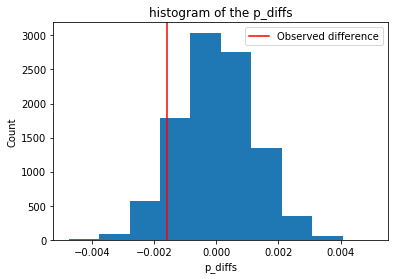

In [29]:
# plot the p_diffs gistogram with the observd difference line
diff = df2[df2['group'] == 'treatment'].converted.mean() - \
df2[df2['group'] == 'control'].converted.mean()
plt.hist(p_diffs)
plt.axvline(x=diff, color='r', label="Observed difference")
plt.xlabel('p_diffs')
plt.ylabel('Count')
plt.title('histogram of the p_diffs');
plt.legend()
plt.show()
#https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
act_diff = df2[df2['group'] == 'treatment'].converted.mean() \
-  df2[df2['group'] == 'control'].converted.mean()
(act_diff < p_diffs).mean()

0.90880000000000005

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The value computed in part j called the **P-Value**

**This values helps us to decide whether we reject the null hypothesis or not

**The computed in the last step is very high, about 90%, it means we can't reject null hypothesis which means we can't prove that there is much difference between old and new and we can't say that the new treatment is better

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" & converted == 1')['converted'].count()
convert_new = df2.query('group == "treatment" & converted == 1')['converted'].count()
n_old = n_old
n_new = n_new

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [32]:
z_score,p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score,p_value

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**They mean that we can't ignore null histerisis and the we can't prove that 
**the new treatment is better
and they agree with the findings from parts j and k

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**For binary variables we better use logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
df2[['control','ab_page']]= pd.get_dummies(df2['group'])
df2 = df2.drop('control',axis = 1)
df2['intercept'] = 1
df2.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [34]:
model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
# Workaround for known bug with .summary() with updated scipy
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 13 Nov 2020   Pseudo R-squ.:               8.077e-06
Time:                        13:13:24   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**for ab_page, p-value = 0.19 which is still higher tha 0.05 the same case as Part II so we can't reject null
**but the values differ greatly which is because in Part II we we performed a one-sided test 
but in the logistic regression part we performed two-sided test

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It will be better to add consider new factors because some results needs can effected greatly by individual happits of the test samples
but there are disadvantages to adding additional terms into regression model because it can influence the results in different direction that is not known**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [36]:
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [37]:
df3 = countries_df.set_index('user_id').join(df2.set_index('user_id'), how = 'inner')
df3.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [38]:
#adding dummy columns for US and UK
df3[['US', 'UK']] = pd.get_dummies(df3['country'])[['US', "UK"]]
df3.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,US,UK
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


In [39]:
model = sm.Logit(df3['converted'], df3[['intercept', 'US', 'UK']])
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 13 Nov 2020   Pseudo R-squ.:               1.521e-05
Time:                        13:13:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

**for US, p-value = 0.129 and 
for UK, p-value = 0.074 
both values are still higher tha 0.05 the same case at the beginning of Part III when we used logistic regression 
we still can't reject null Hypnothesis**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [40]:
#we would now like to look at an interaction between page and country 
#this is how an interaction could be done as suggested in last review
df3['us_page'] = df3['US'] * df3['ab_page']
df3['uk_page'] = df3['UK'] * df3['ab_page']

In [41]:
model = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'US', 'UK', 'us_page', 'uk_page']])
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Fri, 13 Nov 2020   Pseudo R-squ.:               3.482e-05
Time:                        13:13:26   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
us_page        0.0469      0.054      0.872      0.383      -0.059       0.152
uk_page        0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

**after cosidering the interactions between page and country**
##### for US, p-value = 0.195 
##### for US, p-value = 0.642  
##### for UK, p-value = 0.767
##### for us_page, p-value = 0.383
##### for uk_page, p-value = 0.168 


### We notice that:
**all values are still higher tha 0.05 the same case at the beginning of Part III when we used logistic regression 
we still can't reject null Hypnothesis**

### Conslusion: 
**We can't prove that the new treatment is better because we don't have enough evidence of the matter**

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0